# 6.1.4

In [48]:
# 6.1.4

# Create Latitude and Longitude Combinations


In [49]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

import time
from datetime import datetime

import requests

In [50]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [51]:
# 6.1.5

from citipy import citipy

In [52]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# removed print for API

In [53]:
# had to add this for the next line to work

coordinates = list(lat_lngs)

In [36]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


617

In [7]:
# 6.2.6
# Get the City Weather Data

In [8]:
# Import Dependencies, and Initialize an Empty List and Counters

In [9]:

# Import the API key.
from config import weather_api_key

In [55]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | vila velha
Processing Record 3 of Set 1 | busembatia
Processing Record 4 of Set 1 | hasaki
Processing Record 5 of Set 1 | damietta
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | mana
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | guerrero negro
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | tilichiki
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | comodoro rivadavia
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | touros
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | bukan
Processing Record 22 of Set 1 | isangel
Processing Record 23 of Set 1 | punta arenas

Processing Record 35 of Set 4 | alofi
Processing Record 36 of Set 4 | manta
Processing Record 37 of Set 4 | kaitangata
Processing Record 38 of Set 4 | atasu
Processing Record 39 of Set 4 | caravelas
Processing Record 40 of Set 4 | torbay
Processing Record 41 of Set 4 | biharamulo
Processing Record 42 of Set 4 | bay roberts
Processing Record 43 of Set 4 | quatre cocos
Processing Record 44 of Set 4 | chuy
Processing Record 45 of Set 4 | clyde river
Processing Record 46 of Set 4 | charleville-mezieres
Processing Record 47 of Set 4 | keelung
Processing Record 48 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 49 of Set 4 | iqaluit
Processing Record 50 of Set 4 | gazli
Processing Record 1 of Set 5 | hilo
Processing Record 2 of Set 5 | airai
Processing Record 3 of Set 5 | mossendjo
Processing Record 4 of Set 5 | geraldton
Processing Record 5 of Set 5 | naze
Processing Record 6 of Set 5 | ponta do sol
Processing Record 7 of Set 5 | gravdal
Processing Record 8 of Set 5 | s

Processing Record 22 of Set 8 | pimentel
Processing Record 23 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 24 of Set 8 | monrovia
Processing Record 25 of Set 8 | wanxian
Processing Record 26 of Set 8 | micheweni
Processing Record 27 of Set 8 | treuchtlingen
Processing Record 28 of Set 8 | gap
Processing Record 29 of Set 8 | kribi
Processing Record 30 of Set 8 | zhigansk
Processing Record 31 of Set 8 | willmar
Processing Record 32 of Set 8 | ishigaki
Processing Record 33 of Set 8 | lorengau
Processing Record 34 of Set 8 | jaque
Processing Record 35 of Set 8 | ilulissat
Processing Record 36 of Set 8 | wilmington
Processing Record 37 of Set 8 | russell
Processing Record 38 of Set 8 | caucaia
Processing Record 39 of Set 8 | lalas
Processing Record 40 of Set 8 | coquimbo
Processing Record 41 of Set 8 | samusu
City not found. Skipping...
Processing Record 42 of Set 8 | poum
Processing Record 43 of Set 8 | altamira
Processing Record 44 of Set 8 | sao filipe
Processing Rec

Processing Record 15 of Set 12 | sao jose da coroa grande
Processing Record 16 of Set 12 | nizhniy kuranakh
Processing Record 17 of Set 12 | fort saint john
City not found. Skipping...
Processing Record 18 of Set 12 | novokayakent
Processing Record 19 of Set 12 | tigre
Processing Record 20 of Set 12 | dabat
Processing Record 21 of Set 12 | urucara
Processing Record 22 of Set 12 | nambiyur
Processing Record 23 of Set 12 | harare
Processing Record 24 of Set 12 | portel
Processing Record 25 of Set 12 | yerbogachen
Processing Record 26 of Set 12 | burriana
Processing Record 27 of Set 12 | corn island
Processing Record 28 of Set 12 | sfantu gheorghe
Processing Record 29 of Set 12 | usinsk
Processing Record 30 of Set 12 | kavieng
Processing Record 31 of Set 12 | cubuk
Processing Record 32 of Set 12 | puerto penasco
Processing Record 33 of Set 12 | pedasi
Processing Record 34 of Set 12 | aksu
Processing Record 35 of Set 12 | mount isa
Processing Record 36 of Set 12 | sao desiderio
Processing 

In [56]:
# should be len(city_data) I think

len(cities)

617

In [57]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,57.94,58,80,19.19,AU,2022-09-19 06:48:09
1,Vila Velha,-20.3297,-40.2925,63.95,84,0,2.30,BR,2022-09-19 06:48:10
2,Busembatia,0.7697,33.6131,77.25,65,10,0.34,UG,2022-09-19 06:48:10
3,Hasaki,35.7333,140.8333,84.60,87,75,23.15,JP,2022-09-19 06:48:11
4,Damietta,31.4165,31.8133,78.69,55,2,4.38,EG,2022-09-19 06:48:11
5,Hermanus,-34.4187,19.2345,55.80,59,35,3.83,ZA,2022-09-19 06:48:12
6,Butaritari,3.0707,172.7902,82.24,72,3,16.20,KI,2022-09-19 06:48:12
7,Mana,5.6592,-53.7767,77.72,87,85,8.41,GF,2022-09-19 06:48:13
8,Bluff,-46.6000,168.3333,51.28,82,11,3.69,NZ,2022-09-19 06:48:13
9,Guerrero Negro,27.9769,-114.0611,68.11,82,1,14.23,MX,2022-09-19 06:48:14


In [59]:
new_col_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_col_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2022-09-19 06:48:09,-33.6500,115.3333,57.94,58,80,19.19
1,Vila Velha,BR,2022-09-19 06:48:10,-20.3297,-40.2925,63.95,84,0,2.30
2,Busembatia,UG,2022-09-19 06:48:10,0.7697,33.6131,77.25,65,10,0.34
3,Hasaki,JP,2022-09-19 06:48:11,35.7333,140.8333,84.60,87,75,23.15
4,Damietta,EG,2022-09-19 06:48:11,31.4165,31.8133,78.69,55,2,4.38
5,Hermanus,ZA,2022-09-19 06:48:12,-34.4187,19.2345,55.80,59,35,3.83
6,Butaritari,KI,2022-09-19 06:48:12,3.0707,172.7902,82.24,72,3,16.20
7,Mana,GF,2022-09-19 06:48:13,5.6592,-53.7767,77.72,87,85,8.41
8,Bluff,NZ,2022-09-19 06:48:13,-46.6000,168.3333,51.28,82,11,3.69
9,Guerrero Negro,MX,2022-09-19 06:48:14,27.9769,-114.0611,68.11,82,1,14.23


In [69]:
# Create the output file (CSV).
output_data_file = "weather_data.csv"

# export to csv
city_data_df.to_csv(output_data_file, index_label = "City ID")

In [73]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [74]:
 ################################

In [76]:
# Import time module
import time


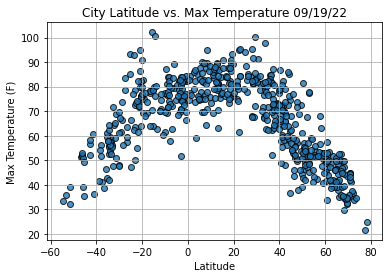

In [84]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# show plot
plt.show()



In [88]:
# 6.3.2
# Plot Latitude vs. Humidity

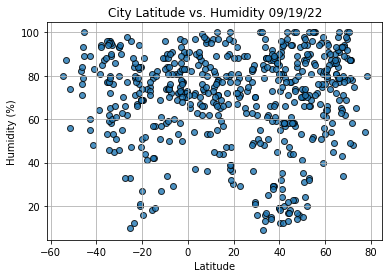

In [92]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.


In [94]:
# 6.3.3
# Plot Latitude vs. Cloudiness

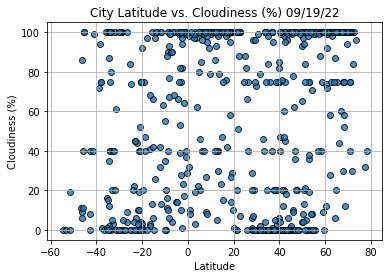

In [96]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.

# Show plot.
plt.show()


In [97]:
# 6.3.4
# Plot Latitude vs. Wind Speed

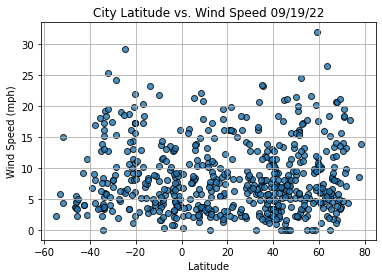

In [98]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
# plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()
